In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
ds=pd.read_csv("InsuranceFruad.csv",on_bad_lines='skip')
ds

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
4992,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
4993,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
4994,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
ds.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [4]:
ds.shape

(4996, 40)

# Checking DataTypes

In [5]:
ds.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

# Checking Null Values

In [6]:
ds.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

# Removing Null Values

In [7]:
ds['_c39'].fillna(ds['_c39'].mean(),inplace=True)

In [8]:
ds.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [9]:
ds['_c39'].value_counts()

Series([], Name: _c39, dtype: int64)

In [10]:
ds=ds.drop(['_c39'],axis=1)
ds

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
4992,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
4993,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
4994,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


# Target Variable

In [11]:
ds['fraud_reported'].value_counts()

N    3761
Y    1235
Name: fraud_reported, dtype: int64

There is data imbalance we can use SMOTE technique to balance the data.

In [12]:
import sklearn

In [13]:
sklearn.__version__

'1.1.3'

In [14]:
import numpy
numpy.__version__

'1.21.5'

In [15]:
!pip install scikit-learn

In [16]:
# !pip install --user imbalnced-learn

In [17]:
# !pip install --user imblearn

# !pip install imblearn --user

In [18]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


# EDA PROCESS

In [19]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4996 entries, 0 to 4995
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           4996 non-null   int64  
 1   age                          4996 non-null   int64  
 2   policy_number                4996 non-null   int64  
 3   policy_bind_date             4996 non-null   object 
 4   policy_state                 4996 non-null   object 
 5   policy_csl                   4996 non-null   object 
 6   policy_deductable            4996 non-null   int64  
 7   policy_annual_premium        4996 non-null   float64
 8   umbrella_limit               4996 non-null   int64  
 9   insured_zip                  4996 non-null   int64  
 10  insured_sex                  4996 non-null   object 
 11  insured_education_level      4996 non-null   object 
 12  insured_occupation           4996 non-null   object 
 13  insured_hobbies   

In [20]:
ds.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4.996000e+03,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000
mean,203.752202,38.931145,546230.768615,1136.108887,1256.798637,1.101882e+06,501125.580464,25146.216974,-26815.152122,11.648519,1.839672,0.992794,1.485789,52800.132106,7439.003203,7404.757806,37956.371097,2005.101481
std,114.891817,9.120836,257062.854298,611.852560,243.772683,2.297195e+06,71632.662565,27863.109672,28093.858644,6.949536,1.018603,0.819646,1.110510,26366.973539,4876.957864,4821.237839,18861.348427,6.015621
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.000000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000
25%,115.000000,32.000000,335780.000000,500.000000,1090.030000,0.000000e+00,448310.000000,0.000000,-51500.000000,6.000000,1.000000,0.000000,1.000000,41850.000000,4300.000000,4450.000000,30310.000000,2000.000000
50%,199.000000,38.000000,532330.000000,1000.000000,1257.360000,0.000000e+00,466393.000000,0.000000,-24100.000000,12.000000,1.000000,1.000000,1.000000,58140.000000,6780.000000,6750.000000,42120.000000,2005.000000
75%,276.000000,44.000000,760179.000000,2000.000000,1415.740000,0.000000e+00,603248.000000,51100.000000,0.000000,17.000000,3.000000,2.000000,2.000000,70600.000000,11320.000000,10900.000000,50890.000000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.000000,2.000000,3.000000,114920.000000,21450.000000,23670.000000,79560.000000,2015.000000


In [23]:
#dropping unimportant columns
ds=ds.drop(['policy_number','insured_zip','policy_bind_date','incident_date','incident_location','auto_year','incident_hour_of_the_day'],axis=1)
ds

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,1,2,YES,71610,6510,13020,52080,Saab,92x,Y
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,0,0,?,5070,780,780,3510,Mercedes,E400,Y
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,2,3,NO,34650,7700,3850,23100,Dodge,RAM,N
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,0,1,NO,6500,1300,650,4550,Accura,RSX,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991,3,38,OH,500/1000,1000,1310.80,0,FEMALE,Masters,craft-repair,...,0,1,?,87200,17440,8720,61040,Honda,Accord,N
4992,285,41,IL,100/300,1000,1436.79,0,FEMALE,PhD,prof-specialty,...,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,N
4993,130,34,OH,250/500,500,1383.49,3000000,FEMALE,Masters,armed-forces,...,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,N
4994,458,62,IL,500/1000,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,...,0,1,YES,46980,5220,5220,36540,Audi,A5,N


OH    1756
IL    1690
IN    1550
Name: policy_state, dtype: int64


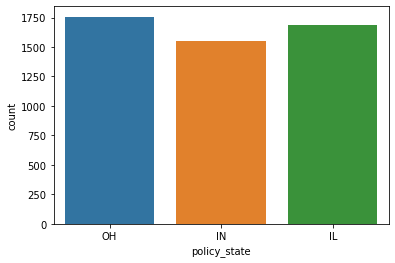

In [21]:
sns.countplot(ds['policy_state'])
print(ds['policy_state'].value_counts())

250/500     1751
100/300     1745
500/1000    1500
Name: policy_csl, dtype: int64


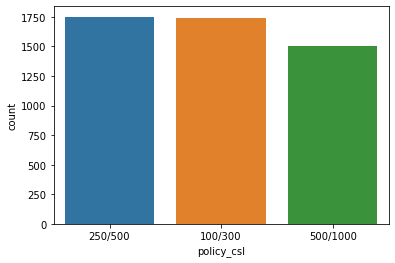

In [22]:
sns.countplot(ds['policy_csl'])
print(ds['policy_csl'].value_counts())

JD             805
High School    800
Associate      721
MD             720
Masters        715
PhD            625
College        610
Name: insured_education_level, dtype: int64


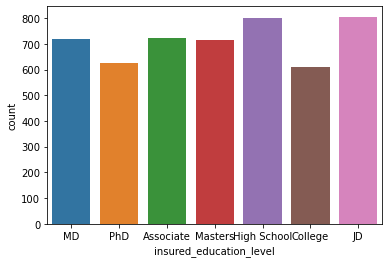

In [24]:
sns.countplot(ds['insured_education_level'])
print(ds['insured_education_level'].value_counts())

Multi-vehicle Collision     2095
Single Vehicle Collision    2015
Vehicle Theft                470
Parked Car                   416
Name: incident_type, dtype: int64


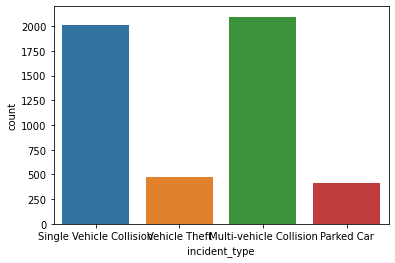

In [25]:
sns.countplot(ds['incident_type'])
print(ds['incident_type'].value_counts())

Rear Collision     1460
Side Collision     1380
Front Collision    1270
?                   886
Name: collision_type, dtype: int64


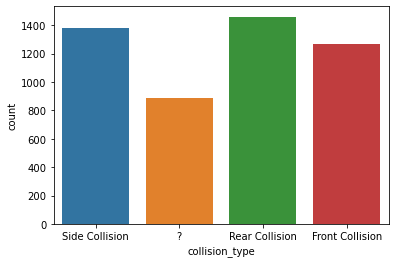

In [26]:
sns.countplot(ds['collision_type'])
print(ds['collision_type'].value_counts())

Minor Damage      1766
Total Loss        1400
Major Damage      1380
Trivial Damage     450
Name: incident_severity, dtype: int64


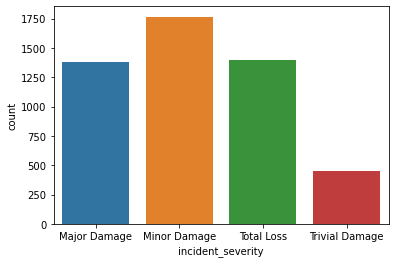

In [27]:
sns.countplot(ds['incident_severity'])
print(ds['incident_severity'].value_counts())

Police       1456
Fire         1115
Other         990
Ambulance     980
None          455
Name: authorities_contacted, dtype: int64


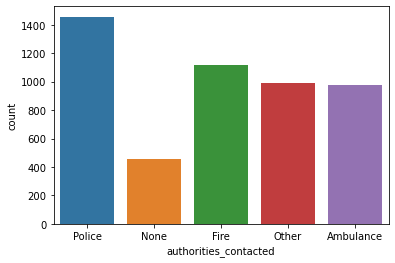

In [28]:
sns.countplot(ds['authorities_contacted'])
print(ds['authorities_contacted'].value_counts())

NO     1715
?      1711
YES    1570
Name: police_report_available, dtype: int64


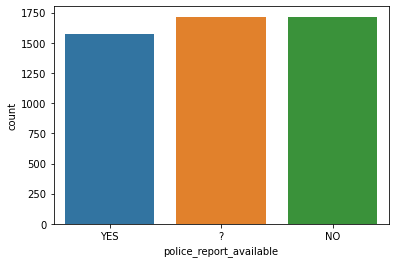

In [29]:
sns.countplot(ds['police_report_available'])
print(ds['police_report_available'].value_counts())

?      1796
NO     1690
YES    1510
Name: property_damage, dtype: int64


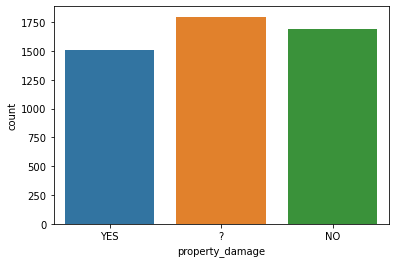

In [30]:
sns.countplot(ds['property_damage'])
print(ds['property_damage'].value_counts())

<AxesSubplot:xlabel='capital-gains', ylabel='Density'>

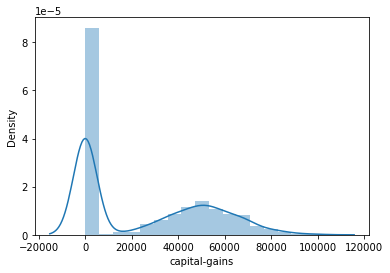

In [31]:
sns.distplot(ds['capital-gains'],kde=True)

<AxesSubplot:xlabel='capital-loss', ylabel='Density'>

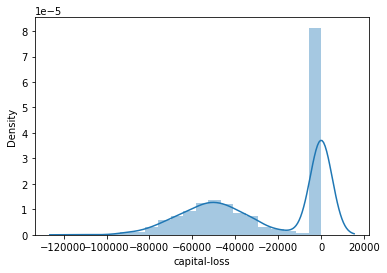

In [32]:
sns.distplot(ds['capital-loss'],kde=True)

<AxesSubplot:xlabel='bodily_injuries', ylabel='Density'>

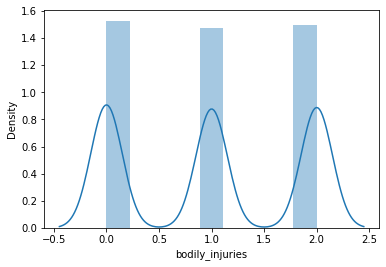

In [33]:
sns.distplot(ds['bodily_injuries'],kde=True)

<AxesSubplot:xlabel='witnesses', ylabel='Density'>

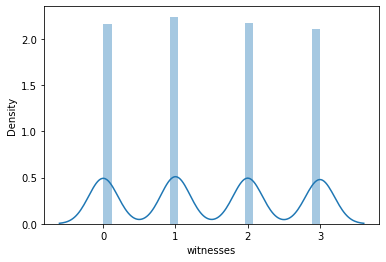

In [34]:
sns.distplot(ds['witnesses'],kde=True)

<AxesSubplot:xlabel='injury_claim', ylabel='Density'>

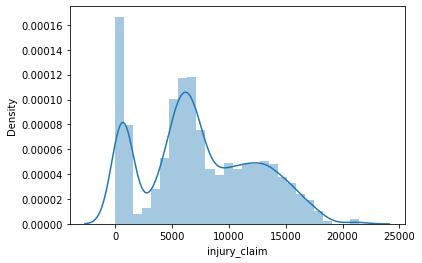

In [35]:
sns.distplot(ds['injury_claim'],kde=True)

<AxesSubplot:xlabel='property_claim', ylabel='Density'>

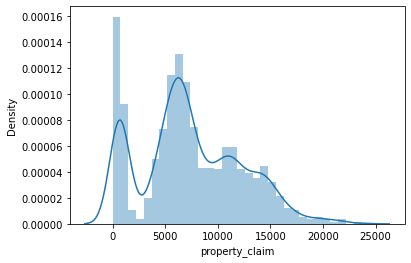

In [36]:
sns.distplot(ds['property_claim'],kde=True)

<AxesSubplot:xlabel='vehicle_claim', ylabel='Density'>

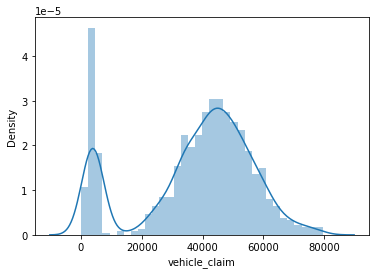

In [37]:
sns.distplot(ds['vehicle_claim'],kde=True)

<AxesSubplot:>

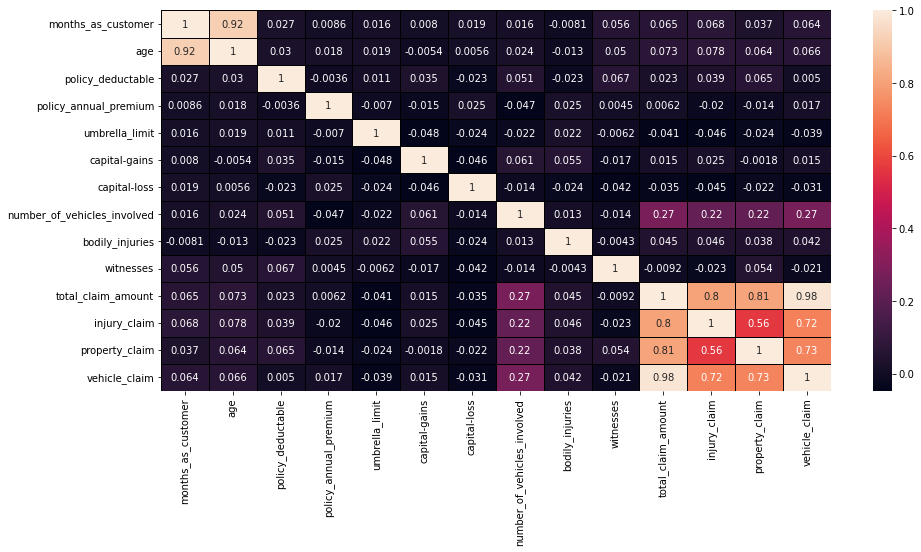

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(ds.corr(),annot=True,linewidth=0.5,linecolor='black')

# Label Encoder

In [40]:
from sklearn.preprocessing import LabelEncoder
columns=[
        'policy_state', 'policy_csl', 'insured_sex',
        'insured_education_level', 'insured_occupation', 'insured_hobbies',
        'insured_relationship',
        'incident_type', 'collision_type', 'incident_severity',
        'authorities_contacted', 'incident_state', 'incident_city',
        'property_damage',
        'police_report_available', 'auto_make',
        'auto_model','fraud_reported',]
le=LabelEncoder()
for cols in columns:
    ds[cols]=le.fit_transform(ds[cols])

In [41]:
ds

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
0,328,48,2,1,1000,1406.91,0,1,4,2,...,1,2,2,71610,6510,13020,52080,10,1,1
1,228,42,1,1,2000,1197.22,5000000,1,4,6,...,0,0,0,5070,780,780,3510,8,12,1
2,134,29,2,0,2000,1413.14,5000000,0,6,11,...,2,3,1,34650,7700,3850,23100,4,30,0
3,256,41,0,1,2000,1415.74,6000000,0,6,1,...,1,2,1,63400,6340,6340,50720,3,34,1
4,228,44,0,2,1000,1583.91,6000000,1,0,11,...,0,1,1,6500,1300,650,4550,0,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991,3,38,2,2,1000,1310.80,0,0,5,2,...,0,1,0,87200,17440,8720,61040,6,6,0
4992,285,41,0,0,1000,1436.79,0,0,6,9,...,2,3,0,108480,18080,18080,72320,13,28,0
4993,130,34,2,1,500,1383.49,3000000,0,5,1,...,2,3,2,67500,7500,7500,52500,11,19,0
4994,458,62,0,2,2000,1356.92,5000000,1,0,5,...,0,1,2,46980,5220,5220,36540,1,5,0


# To check Outliers

months_as_customer                AxesSubplot(0.125,0.536818;0.032563x0.343182)
age                            AxesSubplot(0.164076,0.536818;0.032563x0.343182)
policy_state                   AxesSubplot(0.203151,0.536818;0.032563x0.343182)
policy_csl                     AxesSubplot(0.242227,0.536818;0.032563x0.343182)
policy_deductable              AxesSubplot(0.281303,0.536818;0.032563x0.343182)
policy_annual_premium          AxesSubplot(0.320378,0.536818;0.032563x0.343182)
umbrella_limit                 AxesSubplot(0.359454,0.536818;0.032563x0.343182)
insured_sex                    AxesSubplot(0.398529,0.536818;0.032563x0.343182)
insured_education_level        AxesSubplot(0.437605,0.536818;0.032563x0.343182)
insured_occupation             AxesSubplot(0.476681,0.536818;0.032563x0.343182)
insured_hobbies                AxesSubplot(0.515756,0.536818;0.032563x0.343182)
insured_relationship           AxesSubplot(0.554832,0.536818;0.032563x0.343182)
capital-gains                  AxesSubpl

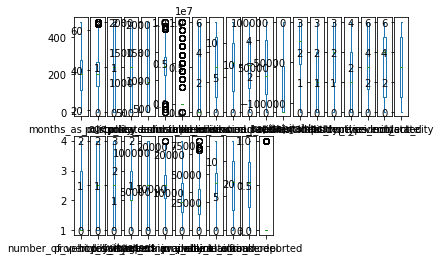

In [42]:
ds.plot(kind='box',subplots=True,layout=(2,20))

In [43]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(ds))
threshold=3
np.where(z>3)
ds_new=ds[(z<3).all(axis=1)]
ds_new

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
0,328,48,2,1,1000,1406.91,0,1,4,2,...,1,2,2,71610,6510,13020,52080,10,1,1
1,228,42,1,1,2000,1197.22,5000000,1,4,6,...,0,0,0,5070,780,780,3510,8,12,1
2,134,29,2,0,2000,1413.14,5000000,0,6,11,...,2,3,1,34650,7700,3850,23100,4,30,0
3,256,41,0,1,2000,1415.74,6000000,0,6,1,...,1,2,1,63400,6340,6340,50720,3,34,1
4,228,44,0,2,1000,1583.91,6000000,1,0,11,...,0,1,1,6500,1300,650,4550,0,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991,3,38,2,2,1000,1310.80,0,0,5,2,...,0,1,0,87200,17440,8720,61040,6,6,0
4992,285,41,0,0,1000,1436.79,0,0,6,9,...,2,3,0,108480,18080,18080,72320,13,28,0
4993,130,34,2,1,500,1383.49,3000000,0,5,1,...,2,3,2,67500,7500,7500,52500,11,19,0
4994,458,62,0,2,2000,1356.92,5000000,1,0,5,...,0,1,2,46980,5220,5220,36540,1,5,0


# Training and Testing Data

In [44]:
x=ds.drop(columns=['fraud_reported'],axis=1)
x

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model
0,328,48,2,1,1000,1406.91,0,1,4,2,...,2,1,2,2,71610,6510,13020,52080,10,1
1,228,42,1,1,2000,1197.22,5000000,1,4,6,...,0,0,0,0,5070,780,780,3510,8,12
2,134,29,2,0,2000,1413.14,5000000,0,6,11,...,1,2,3,1,34650,7700,3850,23100,4,30
3,256,41,0,1,2000,1415.74,6000000,0,6,1,...,0,1,2,1,63400,6340,6340,50720,3,34
4,228,44,0,2,1000,1583.91,6000000,1,0,11,...,1,0,1,1,6500,1300,650,4550,0,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991,3,38,2,2,1000,1310.80,0,0,5,2,...,2,0,1,0,87200,17440,8720,61040,6,6
4992,285,41,0,0,1000,1436.79,0,0,6,9,...,2,2,3,0,108480,18080,18080,72320,13,28
4993,130,34,2,1,500,1383.49,3000000,0,5,1,...,0,2,3,2,67500,7500,7500,52500,11,19
4994,458,62,0,2,2000,1356.92,5000000,1,0,5,...,0,0,1,2,46980,5220,5220,36540,1,5


In [45]:
y=ds['fraud_reported']
y

0       1
1       1
2       0
3       1
4       0
       ..
4991    0
4992    0
4993    0
4994    0
4995    0
Name: fraud_reported, Length: 4996, dtype: int32

# Using SMOTE to balance the dataset

In [46]:
from imblearn.over_sampling import SMOTE

In [47]:
smt=SMOTE()
trainx,trainy=smt.fit_resample(x,y)

In [48]:
trainx.value_counts()

months_as_customer  age  policy_state  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  insured_sex  insured_education_level  insured_occupation  insured_hobbies  insured_relationship  capital-gains  capital-loss  incident_type  collision_type  incident_severity  authorities_contacted  incident_state  incident_city  number_of_vehicles_involved  property_damage  bodily_injuries  witnesses  police_report_available  total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  auto_model
264                 41   2             0           500                1411.300000            0               1            6                        9                   6                4                     55600           0            2              2               1                  3                      3               4              1                            1                1                0          0                        60390               10980         549

In [49]:
trainy.value_counts()

1    3761
0    3761
Name: fraud_reported, dtype: int64

In [50]:
trainy

0       1
1       1
2       0
3       1
4       0
       ..
7517    1
7518    1
7519    1
7520    1
7521    1
Name: fraud_reported, Length: 7522, dtype: int32

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

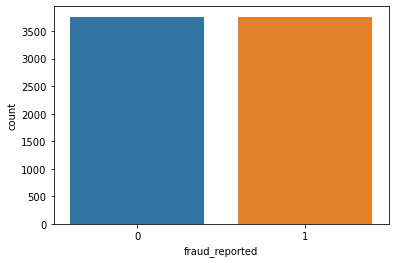

In [51]:
sns.countplot(trainy)

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [53]:
x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,test_size=0.20,random_state=45)

In [54]:
x_train.shape

(6017, 31)

# AS THERE ARE TOTAL 40 COLUMNS WE CAN REDUCE IT BY USING PCA TECHNIQUE SO REDUCE CONSIDERABLE NO. OF COLUMNS FOR BETTER MODEL PERFORMANCE

In [55]:
from sklearn.decomposition import PCA

In [56]:
pca=PCA(n_components=10)

In [57]:
trainx=pca.fit_transform(trainx)

In [58]:
trainx.shape

(7522, 10)

In [59]:
lg=LogisticRegression()

In [60]:
lg.fit(x_train,y_train)

LogisticRegression()

In [61]:
pred=lg.predict(x_test)
pred

array([1, 0, 1, ..., 0, 1, 0])

In [62]:
accuracy_score(y_test,pred)

0.6066445182724253

In [63]:
confusion_matrix(y_test,pred)

array([[440, 311],
       [281, 473]], dtype=int64)

In [64]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.61      0.59      0.60       751
           1       0.60      0.63      0.62       754

    accuracy                           0.61      1505
   macro avg       0.61      0.61      0.61      1505
weighted avg       0.61      0.61      0.61      1505



In [65]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
model=rfc.fit(x_train,y_train)
prediction=model.predict(x_test)
print('Accuracy on training data:',format(rfc.score(x_train,y_train)))
print('Accuracy on testing data:',format(rfc.score(x_test,y_test)))

Accuracy on training data: 1.0
Accuracy on testing data: 0.9940199335548173


# Confusion Matrix and Classification Report

In [66]:
predrfc=rfc.predict(x_test)
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

[[751   0]
 [  9 745]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       751
           1       1.00      0.99      0.99       754

    accuracy                           0.99      1505
   macro avg       0.99      0.99      0.99      1505
weighted avg       0.99      0.99      0.99      1505



In [75]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
model=dtc.fit(x_train,y_train)
prediction=model.predict(x_test)
print('Accuracy on training data:',format(dtc.score(x_train,y_train)))
print('Accuracy on testing data:',format(dtc.score(x_test,y_test)))

Accuracy on training data: 1.0
Accuracy on testing data: 0.9906976744186047


In [76]:
preddtc=rfc.predict(x_test)
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

[[751   0]
 [  9 745]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       751
           1       1.00      0.99      0.99       754

    accuracy                           0.99      1505
   macro avg       0.99      0.99      0.99      1505
weighted avg       0.99      0.99      0.99      1505



In [77]:
from sklearn.svm import SVC
svc=SVC()
model=svc.fit(x_train,y_train)
prediction=model.predict(x_test)
print('Accuracy on training data:',format(svc.score(x_train,y_train)))
print('Accuracy on testing data:',format(svc.score(x_test,y_test)))

Accuracy on training data: 0.5243476815688881
Accuracy on testing data: 0.5249169435215947


In [78]:
predsvc=svc.predict(x_test)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

[[616 135]
 [580 174]]
              precision    recall  f1-score   support

           0       0.52      0.82      0.63       751
           1       0.56      0.23      0.33       754

    accuracy                           0.52      1505
   macro avg       0.54      0.53      0.48      1505
weighted avg       0.54      0.52      0.48      1505



# From the above 4 models we choose RandomForestClassifier as our model as we getting maximum accuracy from it.

# Hyperparameter Tuning

In [79]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
model=rfc.fit(x_train,y_train)
prediction=model.predict(x_test)
print('Accuracy on training data:',format(rfc.score(x_train,y_train)))
print('Accuracy on testing data:',format(rfc.score(x_test,y_test)))
model=RandomForestClassifier(n_estimators=100,min_samples_split=25,max_depth=7,max_features=1)

Accuracy on training data: 1.0
Accuracy on testing data: 0.9940199335548173


# AUC ROC Curve

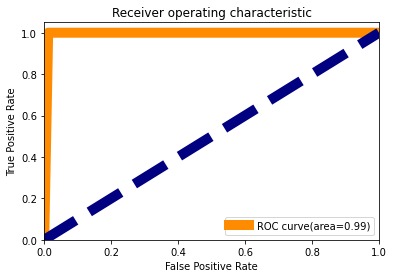

In [81]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(predrfc,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

# Saving The Model

In [77]:
import joblib
joblib.dump(rfc,'rfcfile.obj')
rfc_from_joblib=joblib.load('rfcfile.obj')
rfc_from_joblib.predict(x_test)

array([1, 0, 1, ..., 0, 1, 0])

Conclusion